In [184]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.stattools import adfuller, kpss
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate
from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [185]:
gold = pd.read_csv('ouro2.csv')
gold.columns = ['data', 'today_price']
gold['data']= pd.to_datetime(gold.data) #transform data into datetime
#Variação do preço do ouro
gold['next_week_price'] = gold.today_price.shift(1)
gold['delta'] = gold.next_week_price - gold.today_price
#gold['s3'] = gold.delta.rolling(window=3).mean()
#gold['s10'] = gold.delta.rolling(window=10).mean()
gold['m3'] = gold.today_price.rolling(window=3).mean()
gold['m5'] = gold.today_price.rolling(window=5).mean()
gold['m7'] = gold.today_price.rolling(window=7).mean()
gold['m9'] = gold.today_price.rolling(window=9).mean()
gold['m12'] = gold.today_price.rolling(window=12).mean()
gold['m14'] = gold.today_price.rolling(window=14).mean()
gold['m17'] = gold.today_price.rolling(window=17).mean()
gold['m21'] = gold.today_price.rolling(window=21).mean()
gold['m28'] = gold.today_price.rolling(window=28).mean()
gold.dropna(inplace=True)
print("Número de linhas: {}\nNúmero de colunas: {}".format(gold.shape[0], gold.shape[1]))
gold.head()

Número de linhas: 1069
Número de colunas: 13


,data,today_price,next_week_price,delta,m3,m5,m7,m9,m12,m14,m17,m21,m28
27,2020-06-12,1853.1,1898.2,45.1,1881.466667,1879.12,1871.342857,1863.544444,1843.016667,1824.592857,1809.229412,1801.695238,1819.032143
28,2020-11-29,1849.0,1853.1,4.1,1866.766667,1879.84,1869.085714,1867.011111,1852.600000,1833.500000,1816.211765,1805.466667,1818.353571
29,2020-11-22,1797.5,1849.0,51.5,1833.200000,1858.18,1863.157143,1860.655556,1853.875000,1840.192857,1819.800000,1806.304762,1815.421429
30,2020-11-15,1888.2,1797.5,-90.7,1844.900000,1857.20,1869.271429,1863.255556,1858.883333,1851.207143,1828.176471,1811.352381,1815.285714
31,2020-08-11,1906.3,1888.2,-18.1,1864.000000,1858.82,1869.342857,1870.733333,1866.258333,1860.071429,1838.882353,1818.947619,1815.321429


In [186]:
gold.tail()

,data,today_price,next_week_price,delta,m3,m5,m7,m9,m12,m14,m17,m21,m28
1091,2000-07-16,280.1,277.7,-2.4,276.800000,276.46,276.200000,275.444444,274.475000,274.092857,272.400000,271.604762,270.671429
1092,2000-09-07,281.1,280.1,-1.0,279.633333,277.32,276.785714,276.422222,275.458333,274.800000,273.376471,272.028571,271.325000
1093,2000-02-07,283.2,281.1,-2.1,281.466667,278.94,278.085714,277.522222,276.258333,275.571429,274.470588,272.719048,272.000000
1094,2000-06-25,290.1,283.2,-6.9,284.800000,282.44,279.985714,278.977778,277.783333,277.057143,275.982353,273.852381,272.935714
1095,2000-06-18,282.7,290.1,7.4,285.333333,283.44,281.071429,279.933333,278.650000,277.707143,276.658824,274.661905,273.460714


### Normal series

<AxesSubplot:xlabel='today_price', ylabel='Count'>

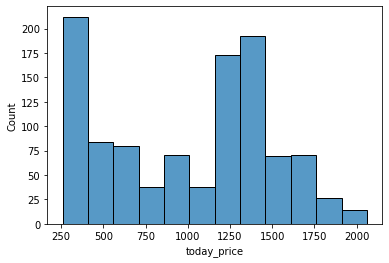

In [187]:
sns.histplot(gold.today_price)

<AxesSubplot:xlabel='data', ylabel='today_price'>

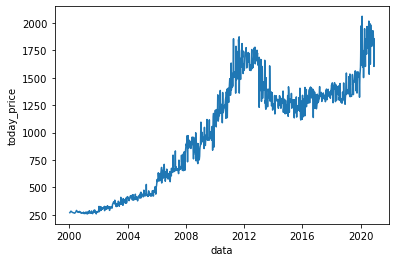

In [188]:
#print timeline graph
sns.lineplot(x=gold.data,y=gold.today_price)
#sns.lineplot(x=gold.data,y=gold.m7)
#sns.lineplot(x=gold.data,y=gold.m14)
#sns.lineplot(x=gold.data,y=gold.m21)

## Conjunto de treinamento

In [189]:
y_test = gold.next_week_price.tail(100) #Consideramos como treinamento os 100 ultimos dias
#X_test = gold.tail(100).drop(['data','today_price','next_week_price'],axis=1)
#X_train = gold.head(-100).drop(['data','today_price','next_week_price'],axis=1)
print('Conjunto y de teste')
print("Número de linhas: {}".format(y_test.shape[0]))
y_test.head()

Conjunto y de teste
Número de linhas: 100


996     320.4
997     310.6
998     311.0
999     312.2
1000    311.6
Name: next_week_price, dtype: float64

In [190]:
y_train = gold.next_week_price.head(-100)
print('Conjunto y de treino')
print("Número de linhas: {}".format(y_train.shape[0]))
y_train.head()

Conjunto y de treino
Número de linhas: 969


27    1898.2
28    1853.1
29    1849.0
30    1797.5
31    1888.2
Name: next_week_price, dtype: float64

## Baseline

In [191]:
baseline = X_test.query('delta > 0')
acertos_bl = baseline.shape[0]
print("Acertos: {}".format(acertos_bl))

Acertos: 50


# Com delta

### Definindo os conjuntos de entrada para treino e teste

In [192]:
X_test = gold.filter(['delta','m3','m5','m7'],axis=1).tail(100)
print('Conjunto X de teste')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_test.shape[0], X_test.shape[1]))
X_test.head()

Conjunto X de teste
Número de linhas: 100
Número de colunas: 4


,delta,m3,m5,m7
996,9.8,319.166667,320.24,319.900000
997,-0.4,314.000000,318.62,319.542857
998,-1.2,311.266667,316.14,317.771429
999,0.6,311.600000,313.16,316.700000
1000,9.3,308.700000,309.54,313.514286


In [193]:
X_train = gold.filter(['delta','m3','m5','m7'],axis=1).head(-100)
print('Conjunto X de treino')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_train.shape[0], X_train.shape[1]))
X_train.head()

Conjunto X de treino
Número de linhas: 969
Número de colunas: 4


,delta,m3,m5,m7
27,45.1,1881.466667,1879.12,1871.342857
28,4.1,1866.766667,1879.84,1869.085714
29,51.5,1833.200000,1858.18,1863.157143
30,-90.7,1844.900000,1857.20,1869.271429
31,-18.1,1864.000000,1858.82,1869.342857


## Linear Regressor

In [194]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.coef_[3], linear.intercept_))

Linear Regression model
Gold Week Price (y) = 0.39 * Delta (x1) + 1.38 * 3 Days Moving Average (x2) + -0.48 * 5 Days Moving Average (x3) + 0.10 * 7 Days Moving Average (x4) + -0.01 (constant)


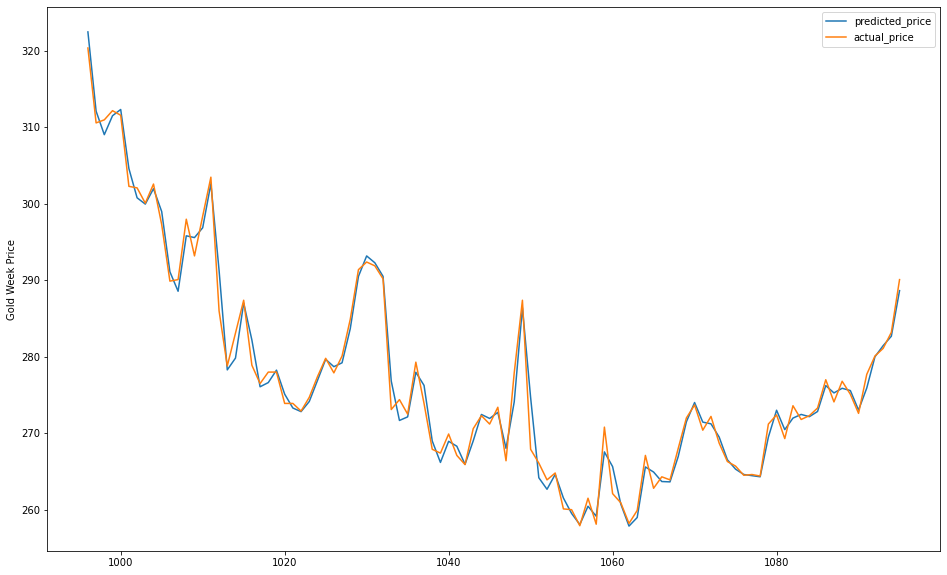

In [195]:
predicted_price = linear.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [196]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [197]:
r2_score = linear.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

98.62

In [198]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 87


## Ridge

In [199]:
alpha_list = 10**(np.random.uniform(-3, 3, 50))
final_r2 = np.NINF
for alpha_value in alpha_list:
    ridge = Ridge(alpha=alpha_value).fit(X_train, y_train)
    predicted_price = ridge.predict(X_test)
    r2_score = ridge.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_alpha = alpha_value
        final_coef0 = ridge.coef_[0]
        final_coef1 = ridge.coef_[1]
        final_coef2 = ridge.coef_[2]
        final_coef3 = ridge.coef_[3]
        final_intercept = ridge.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Melhor alpha = {}".format(final_alpha))
print("Linear Regression model with Ridge (l2) regularization")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = 0.9862323442909465
Melhor alpha = 644.7736868402575
Linear Regression model with Ridge (l2) regularization
Gold Week Price (y) = 0.39 * Delta (x1) + 1.37 * 3 Days Moving Average (x2) + -0.45 * 5 Days Moving Average (x3) + 0.09 * 7 Days Moving Average (x4) + -0.00 (constant)


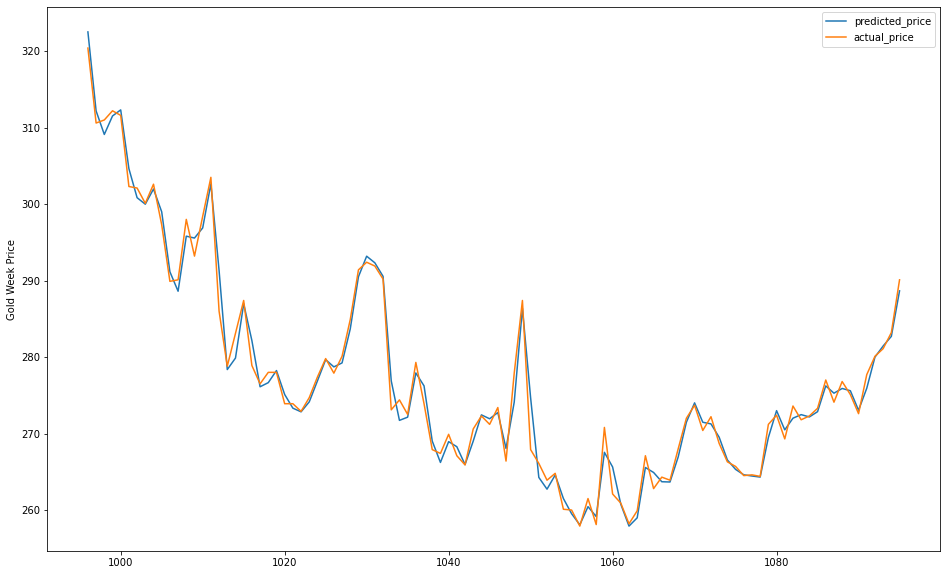

In [200]:
ridge = Ridge(alpha=final_alpha).fit(X_train, y_train)
predicted_price = ridge.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [201]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [202]:
r2_score = ridge.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

98.62

In [203]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 87


## Lasso

In [204]:
alpha_list = 10**(np.random.uniform(-3, 3, 50))
final_r2 = np.NINF
for alpha_value in alpha_list:
    lasso = Lasso(alpha=alpha_value, max_iter=10000).fit(X_train, y_train)
    predicted_price = lasso.predict(X_test)
    r2_score = lasso.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_alpha = alpha_value
        final_coef0 = lasso.coef_[0]
        final_coef1 = lasso.coef_[1]
        final_coef2 = lasso.coef_[2]
        final_coef3 = lasso.coef_[3]
        final_intercept = lasso.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Melhor alpha = {}".format(final_alpha))
print("Lasso (l1) regularization")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = 0.9863787452967071
Melhor alpha = 0.6631123549595478
Lasso (l1) regularization
Gold Week Price (y) = 0.39 * Delta (x1) + 1.31 * 3 Days Moving Average (x2) + -0.34 * 5 Days Moving Average (x3) + 0.03 * 7 Days Moving Average (x4) + 0.06 (constant)


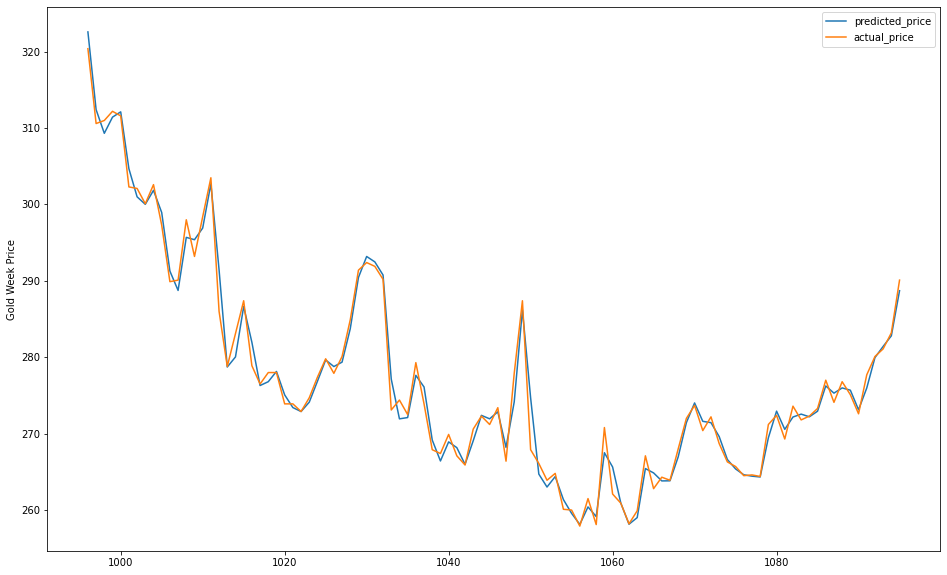

In [205]:
lasso = Lasso(alpha=final_alpha, max_iter=10000).fit(X_train, y_train)
predicted_price = lasso.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [206]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [207]:
r2_score = lasso.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

98.64

In [208]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 86


## Random Forest Regressor

In [209]:
n_estimators_list = [25, 50, 75]
final_r2 = np.NINF
for n_estimators_value in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n_estimators_value, max_features=2).fit(X_train, y_train)
    predicted_price = rf.predict(X_test)
    r2_score = rf.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_n_estimators = n_estimators_value    
print("Melhor R2 = {}".format(final_r2))
print("Valor de estimadores = {}".format(final_n_estimators))

Melhor R2 = -4.711265382723046
Valor de estimadores = 25


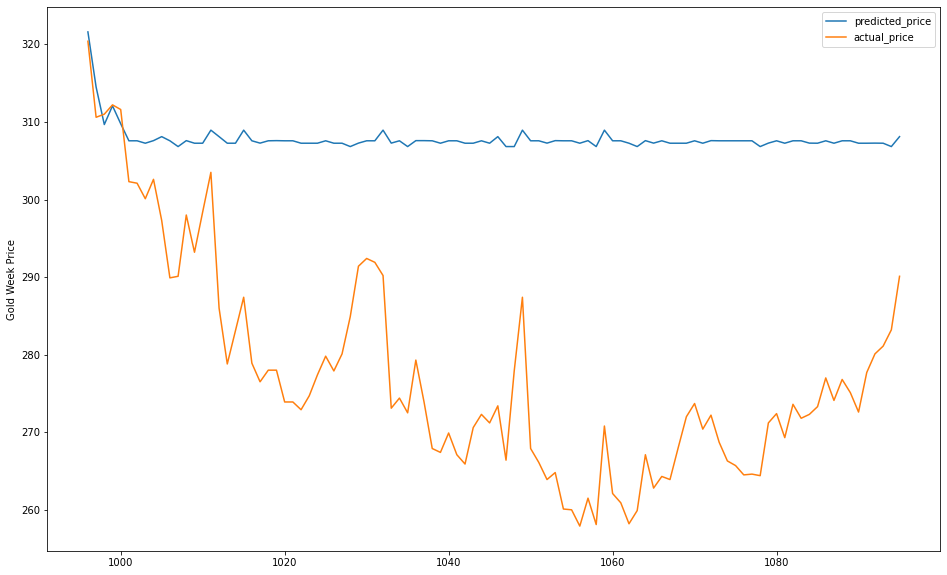

In [210]:
rf = RandomForestRegressor(n_estimators=final_n_estimators).fit(X_train, y_train)
predicted_price = rf.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [211]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [212]:
r2_score = rf.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

-470.37

In [213]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 64


## Linear SVM Regressor

In [214]:
epsilon_list = [0.1, 0.3]
C_list = 2**(np.random.uniform(-5, 15, 10))
final_r2 = np.NINF
for C_value in C_list:
    epsilon_value = random.choice(epsilon_list)
    lsvmr = LinearSVR(epsilon = epsilon_value, C = C_value, max_iter = 10000).fit(X_train, y_train)
    predicted_price = lsvmr.predict(X_test)
    r2_score = lsvmr.score(X_test, y_test)
    if r2_score > final_r2:
        final_r2 = r2_score
        final_epsilon = epsilon_value
        final_C = C_value
        final_coef0 = lsvmr.coef_[0]
        final_coef1 = lsvmr.coef_[1]
        final_coef2 = lsvmr.coef_[2]
        final_coef3 = lsvmr.coef_[3]
        final_intercept = lsvmr.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Valor do epsilon = {}".format(final_epsilon))
print("Valor do C = {}".format(final_C))
print("Linear SVM Regressor model")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = 0.9862592877888928
Valor do epsilon = 0.1
Valor do C = 666.5386106431497
Linear SVM Regressor model
Gold Week Price (y) = 0.39 * Delta (x1) + 1.37 * 3 Days Moving Average (x2) + -0.45 * 5 Days Moving Average (x3) + 0.08 * 7 Days Moving Average (x4) + -0.01 (constant)


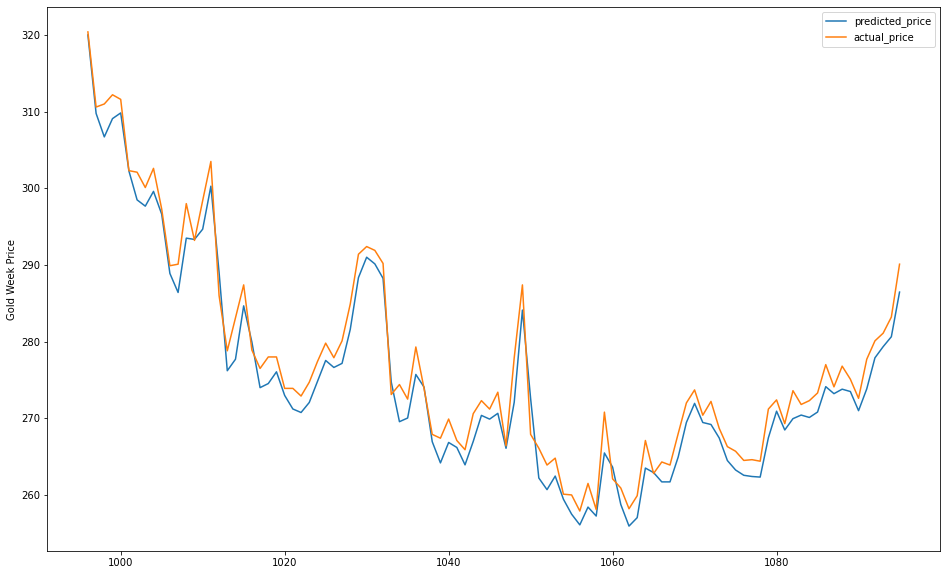

In [215]:
lsvmr = LinearSVR(epsilon = final_epsilon, C = final_C, max_iter = 10000).fit(X_train, y_train)
predicted_price = lsvmr.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [216]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [217]:
r2_score = lsvmr.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

96.23

In [218]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 87


## RBF SVM Regressor

In [219]:
epsilon_list = [0.1, 0.3]
C_list = 2**(np.random.uniform(-5, 15, 10))
gamma_list = 2**(np.random.uniform(-9, 3, 10))
final_r2 = np.NINF
for C_value in C_list:
    epsilon_value = random.choice(epsilon_list)
    gamma_value = random.choice(gamma_list)
    svr = SVR(gamma = gamma_value, epsilon = epsilon_value, C = C_value, kernel='rbf').fit(X_train, y_train)
    predicted_price = svr.predict(X_test)
    r2_score = svr.score(X_test, y_test)    
    if r2_score > final_r2:
        final_r2 = r2_score
        final_epsilon = epsilon_value
        final_C = C_value
        final_gamma = gamma_value
        final_coef0 = lsvmr.coef_[0]
        final_coef1 = lsvmr.coef_[1]
        final_coef2 = lsvmr.coef_[2]
        final_coef3 = lsvmr.coef_[3]
        final_intercept = lsvmr.intercept_
print("Resultado da busca por hiperparâmetros:")
print("Melhor R2 = {}".format(final_r2))
print("Valor do epsilon = {}".format(final_epsilon))
print("Valor do C = {}".format(final_C))
print("Valor do gamma = {}".format(final_gamma))
print("RBF SVM Regressor model")
print("Gold Week Price (y) = %.2f * Delta (x1) \
+ %.2f * 3 Days Moving Average (x2) \
+ %.2f * 5 Days Moving Average (x3) \
+ %.2f * 7 Days Moving Average (x4) \
+ %.2f (constant)" % (final_coef0, final_coef1, final_coef2, final_coef3, final_intercept))

Resultado da busca por hiperparâmetros:
Melhor R2 = -3426.328555249366
Valor do epsilon = 0.1
Valor do C = 831.2756250769554
Valor do gamma = 0.7328899932794555
RBF SVM Regressor model
Gold Week Price (y) = 0.38 * Delta (x1) + 1.36 * 3 Days Moving Average (x2) + -0.44 * 5 Days Moving Average (x3) + 0.07 * 7 Days Moving Average (x4) + -0.02 (constant)


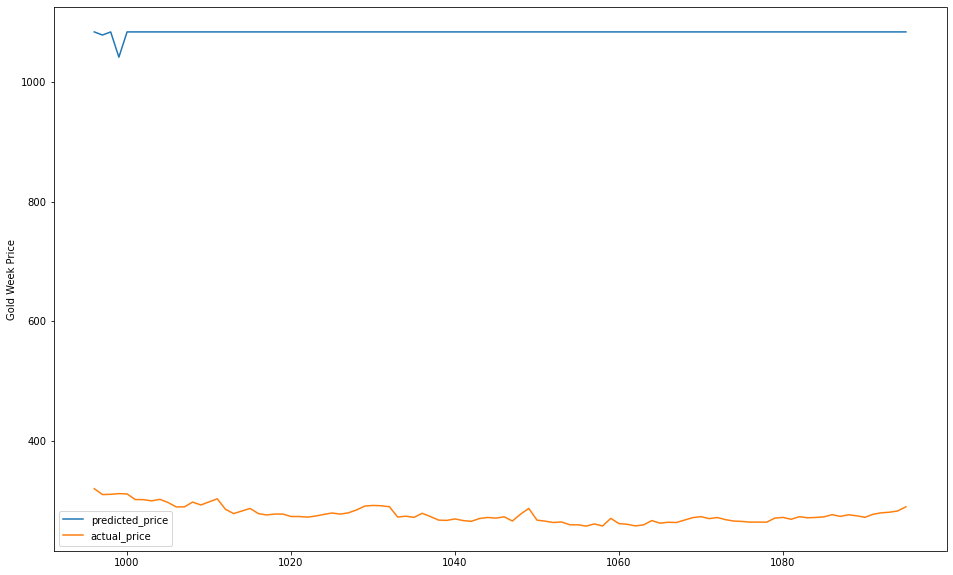

In [220]:
svr = SVR(gamma = final_gamma, epsilon = final_epsilon, C = final_C, kernel='rbf').fit(X_train, y_train)
predicted_price = svr.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [221]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [222]:
r2_score = svr.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

-342632.86

In [223]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 2


# Sem delta

In [224]:
X_test = gold.filter(['m3','m5','m7'],axis=1).tail(100)
print('Conjunto X de teste')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_test.shape[0], X_test.shape[1]))
X_test.head()

Conjunto X de teste
Número de linhas: 100
Número de colunas: 3


,m3,m5,m7
996,319.166667,320.24,319.900000
997,314.000000,318.62,319.542857
998,311.266667,316.14,317.771429
999,311.600000,313.16,316.700000
1000,308.700000,309.54,313.514286


In [225]:
X_train = gold.filter(['m3','m5','m7'],axis=1).head(-100)
print('Conjunto X de treino')
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_train.shape[0], X_train.shape[1]))
X_train.head()

Conjunto X de treino
Número de linhas: 969
Número de colunas: 3


,m3,m5,m7
27,1881.466667,1879.12,1871.342857
28,1866.766667,1879.84,1869.085714
29,1833.200000,1858.18,1863.157143
30,1844.900000,1857.20,1869.271429
31,1864.000000,1858.82,1869.342857


## Linear Regressor

In [226]:
cross_val = cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    scoring=('neg_root_mean_squared_error')
)
rmse_medio =  np.sqrt(np.mean(np.absolute(cross_val['test_score'])))
print("RMSE = {}".format(rmse_medio))

RMSE = 3.5665141515949688


In [227]:
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold Week Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 5 Days Moving Average (x2) \
+ %.2f * 7 Days Moving Average (x3) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.intercept_))

Linear Regression model
Gold Week Price (y) = 1.17 * 3 Days Moving Average (x1) + -0.20 * 5 Days Moving Average (x2) + 0.03 * 7 Days Moving Average (x3) + -0.04 (constant)


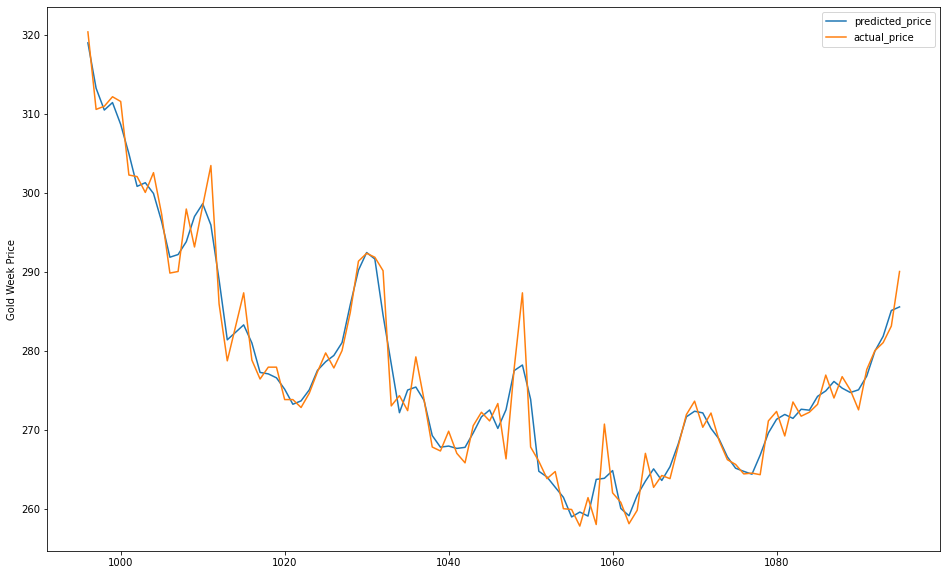

In [228]:
predicted_price = linear.predict(X_test)
d = {'actual_price': y_test,'predicted_price': predicted_price}
df = pd.DataFrame(data=d)
df['actual_var'] = df.actual_price.shift(1) - df.actual_price
df['actual_var_sign'] = np.sign(df.actual_var)
df['predicted_var'] = df.predicted_price.shift(1) - df.predicted_price
df['predicted_var_sign'] = df.predicted_var/abs(df.predicted_var)
df['correct_prediction'] = np.equal(df.actual_var_sign, df.predicted_var_sign)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(16, 10))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Week Price")
plt.show()

In [229]:
df.head(30)
print("Número de linhas: {}".format(df.shape[0]))

Número de linhas: 100


In [230]:
r2_score = linear.score(X_test, y_test)*100
float("{0:.2f}".format(r2_score))

96.53

In [231]:
res = df.query('correct_prediction == True')
acertos = res.shape[0]
print("Acertos: {}".format(acertos))

Acertos: 65
